<a href="https://colab.research.google.com/github/shinyarah/hello-world/blob/master/coreweek2IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION
Which individuals in Kenya, Rwanda and Tanzania are most likely to have or use a bank account?

#METRIC FOR SUCCESS
Identify the most relevant key demographic factors that hugely and directly impact an individual's financial outcomes

#CONTEXT
The dataset contains information on respondents from the 3 countries about their status on bank accounts. It informs on a range of factors including their education background, gender, location, whether they have access to cell phones, age, marital status and if and where they work.

#EXPERIMENTAL DESIGN


In [147]:
#loading our datasets and importing out libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
df = pd.read_csv('/content/Financial Dataset - 1.csv.crdownload')
#abc_2 = "VariableDefinition.csv"
df.head()
#abc_2

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [148]:
abc_2 = pd.read_csv('/content/VariableDefinitions.csv')
abc_2.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


In [149]:
#checking the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 15104 non-null  object 
 1   year                    15104 non-null  int64  
 2   uniqueid                15104 non-null  object 
 3   Has a Bank account      15103 non-null  object 
 4   Type of Location        15103 non-null  object 
 5   Cell Phone Access       15103 non-null  object 
 6   household_size          15095 non-null  float64
 7   Respondent Age          15086 non-null  float64
 8   gender_of_respondent    15099 non-null  object 
 9   The relathip with head  15103 non-null  object 
 10  marital_status          15090 non-null  object 
 11  Level of Educuation     15082 non-null  object 
 12  Type of Job             15082 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [150]:
#previwng columns in the dataset
display(list(df.columns.values))

['country',
 'year',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'household_size',
 'Respondent Age',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

In [151]:
df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania'], dtype=object)

In [152]:
#identifying the missing data
df.isnull()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,False,False,False,False,False,False,False,False,False,False,False,False,False
15100,False,False,False,False,False,False,False,False,False,False,False,False,False
15101,False,False,False,False,False,False,False,False,False,False,False,False,False
15102,False,False,False,False,False,False,False,False,False,False,False,False,False


In [153]:
#dropping the missing values
df.dropna(axis=0, how='any')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15098,Tanzania,2017,uniqueid_296,No,Rural,Yes,2.0,38.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
15099,Tanzania,2017,uniqueid_297,No,Urban,No,2.0,64.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
15100,Tanzania,2017,uniqueid_298,No,Rural,Yes,1.0,17.0,Female,Other non-relatives,Married/Living together,Primary education,Informally employed
15101,Tanzania,2017,uniqueid_299,No,Urban,Yes,1.0,59.0,Female,Head of Household,Widowed,Primary education,Self employed


In [154]:
#Changing yes and no columns to 1 and 0 
df = df.replace(to_replace = "Yes", value = 1)
df = df.replace(to_replace = "No", value = 0)
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,Tanzania,2017,uniqueid_297,0.0,Urban,0.0,2.0,64.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
15100,Tanzania,2017,uniqueid_298,0.0,Rural,1.0,1.0,17.0,Female,Other non-relatives,Married/Living together,Primary education,Informally employed
15101,Tanzania,2017,uniqueid_299,0.0,Urban,1.0,1.0,59.0,Female,Head of Household,Widowed,Primary education,Self employed
15102,Tanzania,2017,uniqueid_300,0.0,Urban,1.0,2.0,46.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed


In [155]:
#dropping missing values in our dataset
df.dropna()
df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [156]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15098,Tanzania,2017,uniqueid_296,0.0,Rural,1.0,2.0,38.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
15099,Tanzania,2017,uniqueid_297,0.0,Urban,0.0,2.0,64.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
15100,Tanzania,2017,uniqueid_298,0.0,Rural,1.0,1.0,17.0,Female,Other non-relatives,Married/Living together,Primary education,Informally employed
15101,Tanzania,2017,uniqueid_299,0.0,Urban,1.0,1.0,59.0,Female,Head of Household,Widowed,Primary education,Self employed


In [157]:
df.isnull().sum()

country                    0
year                       0
uniqueid                   0
Has a Bank account         1
Type of Location           1
Cell Phone Access          1
household_size             9
Respondent Age            18
gender_of_respondent       5
The relathip with head     1
marital_status            14
Level of Educuation       22
Type of Job               22
dtype: int64

In [158]:
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


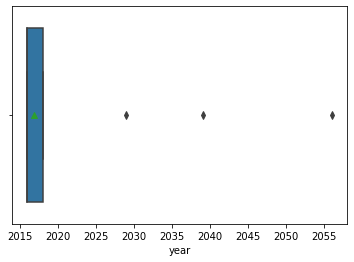

In [159]:
#visualising outliers in column 'year' using the boxplot
sns.boxplot(df["year"], showmeans=True)
#as seen in the boxplot, there is a wide range of outliers in the years category. 
#these are going to have to be removed in order to have related data within the specified category

In [160]:
#removing the invalid years
df=df[df['year']<=2018]
df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


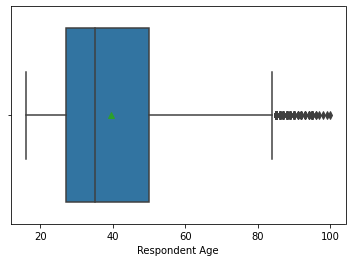

In [161]:
#looking for outliers in the respondents ages
sns.boxplot(df["Respondent Age"], showmeans=True)
#since all the ages fall within an acceptable range, it is inappropriate to remove the outliers

##measures of central tendency

In [162]:
#determining the mean for column 'respondent age'
df["Respondent Age"].mean()

39.4013790360008

In [163]:
#calculating median for respondents age
df["Respondent Age"].median()

35.0

In [164]:
#finding the mode for respondents age
df["Respondent Age"].mode()

0    30.0
dtype: float64

##measures of dispersion

In [165]:
#finding the range for column "respondent age"
df_RespondentAge_max = df["Respondent Age"].max()
df_RespondentAge_min = df["Respondent Age"].min()
df_RespondentAge_max - df_RespondentAge_min

84.0

In [166]:
#skewness
df.skew(axis = 0, skipna = True)

year                  0.358978
Has a Bank account    1.769764
Cell Phone Access    -1.581674
household_size        0.581876
Respondent Age        0.794360
dtype: float64

In [167]:
#finding the variance of the respondents' age
df["Respondent Age"].var()

277.5057718681989

In [168]:
#finding the standard deviation
df["Respondent Age"].std()

16.658504490745827

In [169]:
#IQR
df["Respondent Age"].quantile([0.25,0.5,0.75])

0.25    27.0
0.50    35.0
0.75    50.0
Name: Respondent Age, dtype: float64

In [170]:
#kurtosis
df["Respondent Age"].kurt()

-0.008269644904079332

In [171]:
#summary statistics for the dataframe
df['Respondent Age'].describe()

count    15083.000000
mean        39.401379
std         16.658504
min         16.000000
25%         27.000000
50%         35.000000
75%         50.000000
max        100.000000
Name: Respondent Age, dtype: float64

#univariate analysis

#histogram

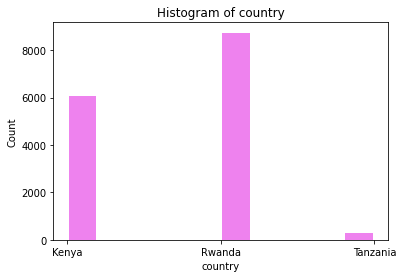

In [172]:
#plotting a country histogram to show the number of respondents in the different countries
RH = df['country']


plt.hist(RH, bins=10, histtype='bar', rwidth=0.9, color='violet')
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Histogram of country')
plt.show()
#Rwanda has the highest number of repondents in our dataset while Tanzania has the least

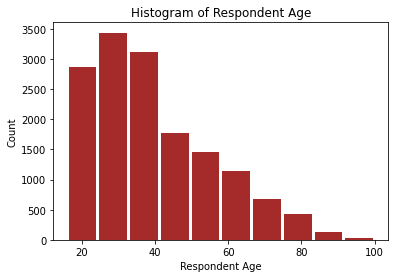

In [173]:
#plotting a histogram for the respondents ages
RH = df['Respondent Age']


plt.hist(RH, bins=10, histtype='bar', rwidth=0.9, color='brown')
plt.xlabel('Respondent Age')
plt.ylabel('Count')
plt.title('Histogram of Respondent Age')
plt.show()
#most responders are young compared to their older counterparts

###bar chart

In [174]:
df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


#bivariate analysis

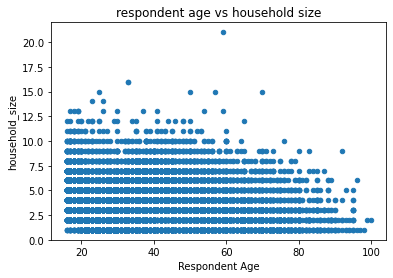

In [175]:
#scatter plot
# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'Respondent Age', y = 'household_size', kind='scatter')

# Giving our scatterplot a title
plt.title('respondent age vs household size')

# Labelling our x axis
plt.xlabel('Respondent Age')

# Labelling our y axis
plt.ylabel('household_size')

# We then display our scatterplot as shown below
plt.show()

#there is no correlation between the household size and the respondents age

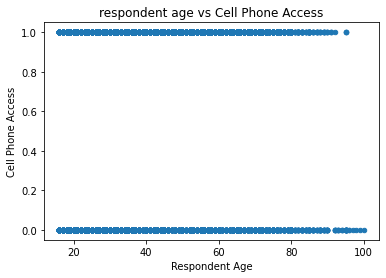

In [176]:
df.plot(x = 'Respondent Age', y = 'Cell Phone Access', kind='scatter')

# Giving our scatterplot a title
plt.title('respondent age vs Cell Phone Access')

# Labelling our x axis
plt.xlabel('Respondent Age')

# Labelling our y axis
plt.ylabel('Cell Phone Access')

# We then display our scatterplot as shown below
plt.show()

In [177]:
df['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [178]:
df['gender_of_respondent'].value_counts()

Female    8858
Male      6238
Name: gender_of_respondent, dtype: int64

In [179]:
#mydf1 = df['gender_of_respondent'] == 'male'
#mydf2 = df['gender_of_respondent'] =='female'

#mydf1.head()

In [180]:
#plotdata = pd.DataFrame({'male': a, 'female': b})
#plotdata.head()


#multivariate analysis

In [181]:
#let's take a look at our dataset again
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [182]:
#preprocessing
x = df.drop(columns={'country', 'uniqueid', 'The relathip with head', 'gender_of_respondent', 'marital_status', 'Type of Job', 'Type of Location', 'marital_status', 'Level of Educuation'})
y = df['Has a Bank account']

In [183]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [184]:
# Normalization
 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [185]:
df.isnull().sum()

country                    0
year                       0
uniqueid                   0
Has a Bank account         1
Type of Location           1
Cell Phone Access          1
household_size             9
Respondent Age            18
gender_of_respondent       5
The relathip with head     1
marital_status            14
Level of Educuation       22
Type of Job               22
dtype: int64

In [186]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1.0,Rural,1.0,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,0.0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,1.0,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,1.0,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,0.0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15098,Tanzania,2017,uniqueid_296,0.0,Rural,1.0,2.0,38.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
15099,Tanzania,2017,uniqueid_297,0.0,Urban,0.0,2.0,64.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
15100,Tanzania,2017,uniqueid_298,0.0,Rural,1.0,1.0,17.0,Female,Other non-relatives,Married/Living together,Primary education,Informally employed
15101,Tanzania,2017,uniqueid_299,0.0,Urban,1.0,1.0,59.0,Female,Head of Household,Widowed,Primary education,Self employed


In [187]:
df.isnull().sum()

country                    0
year                       0
uniqueid                   0
Has a Bank account         1
Type of Location           1
Cell Phone Access          1
household_size             9
Respondent Age            18
gender_of_respondent       5
The relathip with head     1
marital_status            14
Level of Educuation       22
Type of Job               22
dtype: int64

In [188]:
#applying pca
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

ValueError: ignored